## Starter code for the regression mini-project.

Loads up/formats a modified version of the dataset
(why modified?  we've removed some trouble points
that you'll find yourself in the outliers mini-project).

Draws a little scatterplot of the training/testing data

You fill in the regression code where indicated

In [1]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### Print a data point

In [2]:
print(dictionary.keys()[0])
dictionary.values()[0]

METTS MARK


{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

### Prepare data to predict bonus using salary

In [3]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )
### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

### Create Linear Regressor

In [4]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualize

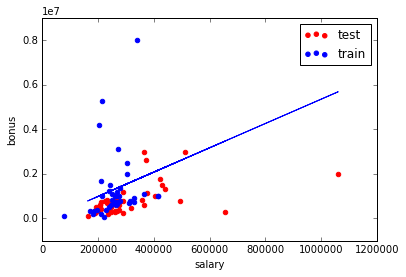

In [5]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
%matplotlib inline
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_train[0], target_train[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    print("some error")
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

### Coefficient, intercept, score

In [6]:
reg.coef_

array([ 5.44814029])

In [7]:
reg.intercept_

-102360.54329387983

In [8]:
reg.score(feature_train,target_train)

0.045509192699524359

In [9]:
reg.score(feature_test, target_test)

-1.4849924173685101

## Regression based on long_term_incentive

In [37]:
features_list_new = ["bonus", "long_term_incentive"]
#data_new = featureFormat(dictionary, features_list_new)
data_new = featureFormat( dictionary, features_list_new, remove_any_zeroes=True)
target_new, feature_new = targetFeatureSplit( data_new )
print(len(target_new))
len(feature_new)

55


55

In [38]:
from sklearn.cross_validation import train_test_split
feature_train_new, feature_test_new, target_train_new, target_test_new = train_test_split(feature_new, target_new, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

In [39]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train_new, target_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

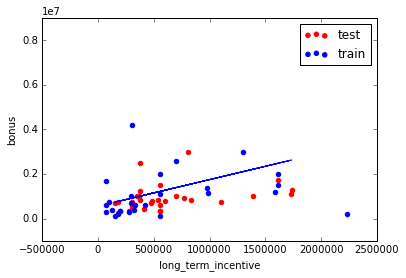

In [40]:
import matplotlib.pyplot as plt
#%matplotlib inline
for feature, target in zip(feature_test_new, target_test_new):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train_new, target_train_new):
    plt.scatter( feature, target, color=train_color ) 

plt.scatter(feature_test_new[0], target_test_new[0], color=test_color, label="test")
plt.scatter(feature_train_new[0], target_train_new[0], color=train_color, label="train")

try:
    plt.plot( feature_test_new, reg.predict(feature_test_new) )
except NameError:
    pass
plt.xlabel(features_list_new[1])
plt.ylabel(features_list_new[0])
plt.legend()
plt.show()


In [41]:
reg.score(feature_test_new,target_test_new)

-0.59271289994986387

## Outliers

In [42]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_test, target_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

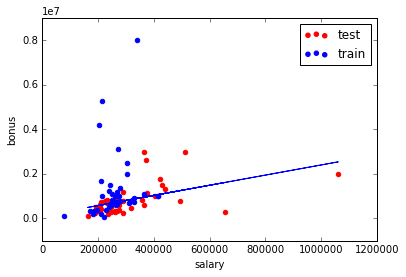

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_train[0], target_train[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    print("some error")
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [44]:
reg.score(feature_test, target_test)

0.251488150398397

In [45]:
reg.coef_

array([ 2.27410114])